In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(101)
samples = ['A','B','C','D','E']
features = ['W','X','Y','Z']
df = pd.DataFrame(np.random.randn(5,4), samples, features)

In [3]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [4]:
df.loc['A', :]

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [5]:
df.loc['A', 'W']

2.706849839399938

In [6]:
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [7]:
df['X+Y'] = df.X + df.Y

In [8]:
df

,W,X,Y,Z,X+Y
A,2.706850,0.628133,0.907969,0.503826,1.536102
B,0.651118,-0.319318,-0.848077,0.605965,-1.167395
C,-2.018168,0.740122,0.528813,-0.589001,1.268936
D,0.188695,-0.758872,-0.933237,0.955057,-1.692109
E,0.190794,1.978757,2.605967,0.683509,4.584725


In [9]:
df > 0

,W,X,Y,Z,X+Y
A,True,True,True,True,True
B,True,False,False,True,False
C,False,True,True,False,True
D,True,False,False,True,False
E,True,True,True,True,True


In [10]:
df[df > 0]

,W,X,Y,Z,X+Y
A,2.706850,0.628133,0.907969,0.503826,1.536102
B,0.651118,NaN,NaN,0.605965,NaN
C,NaN,0.740122,0.528813,NaN,1.268936
D,0.188695,NaN,NaN,0.955057,NaN
E,0.190794,1.978757,2.605967,0.683509,4.584725


## Groupby

In [11]:
data = {
    'company':'Google Google Microsoft Microsoft Facebook Facebook'.split(),
    'Person':'A B C D E F'.split(),
    'Sales':[200, 300, 100, 120, 400, 500]
}

In [12]:
data

{'Person': ['A', 'B', 'C', 'D', 'E', 'F'],
 'Sales': [200, 300, 100, 120, 400, 500],
 'company': ['Google',
  'Google',
  'Microsoft',
  'Microsoft',
  'Facebook',
  'Facebook']}

In [13]:
df = pd.DataFrame(data)
df

,Person,Sales,company
0,A,200,Google
1,B,300,Google
2,C,100,Microsoft
3,D,120,Microsoft
4,E,400,Facebook
5,F,500,Facebook


In [14]:
df.groupby('company').max()

,Person,Sales
company,,
Facebook,F,500
Google,B,300
Microsoft,D,120


In [15]:
df.groupby('company').mean()

,Sales
company,
Facebook,450
Google,250
Microsoft,110


In [16]:
df.groupby('company').std()

,Sales
company,
Facebook,70.710678
Google,70.710678
Microsoft,14.142136


In [17]:
df.groupby('company').describe()

Sales                                                     
          count   mean        std    min    25%    50%    75%    max
company                                                             
Facebook    2.0  450.0  70.710678  400.0  425.0  450.0  475.0  500.0
Google      2.0  250.0  70.710678  200.0  225.0  250.0  275.0  300.0
Microsoft   2.0  110.0  14.142136  100.0  105.0  110.0  115.0  120.0

In [18]:
df.company.value_counts()

Facebook     2
Google       2
Microsoft    2
Name: company, dtype: int64

In [19]:
df

,Person,Sales,company
0,A,200,Google
1,B,300,Google
2,C,100,Microsoft
3,D,120,Microsoft
4,E,400,Facebook
5,F,500,Facebook


In [20]:
df.sort_values(by='Sales', ascending=False)

,Person,Sales,company
5,F,500,Facebook
4,E,400,Facebook
1,B,300,Google
0,A,200,Google
3,D,120,Microsoft
2,C,100,Microsoft


In [21]:
df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')
df[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 21, 2018"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","July 26, 2017"
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","December 5, 2017"
5,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,"March 3, 2017","March 7, 2018"
6,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,"January 27, 2017","May 18, 2017"
7,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,"January 13, 2017","May 18, 2017"
8,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","September 25, 2017"
9,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","June 1, 2017"


In [22]:
#!pip install plotly

In [23]:
#!pip install --upgrade pip

In [24]:
#!pip install cufflinks

In [25]:
#!pip install pandas-datareader

In [26]:
# Create data
data = {'score': [1,1,1,2,2,2,3,3,3]}

# Create dataframe
df = pd.DataFrame(data)

# View dataframe
df

,score
0,1
1,1
2,1
3,2
4,2
5,2
6,3
7,3
8,3


In [27]:
# Calculate the moving average. That is, take
# the first two values, average them, 
# then drop the first and add the third, etc.
df.rolling(window=2).mean()

,score
0,NaN
1,1.0
2,1.0
3,1.5
4,2.0
5,2.0
6,2.5
7,3.0
8,3.0


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.plot(df.index, df.score)
plt.plot(df.index, df.rolling(window=2).mean())

In [29]:
np.random.seed(0)
x = np.linspace(1,20,100)
y = 2 * x + 5 * np.random.randn(100)
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,1.000000,10.820262
1,1.191919,4.384624
2,1.383838,7.661367
3,1.575758,14.355981
4,1.767677,12.873143


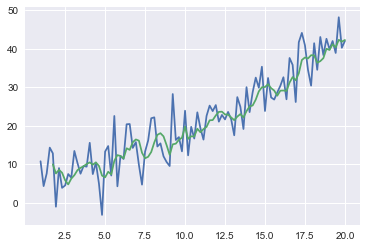

In [30]:
plt.plot(df.x, df.y)
plt.plot(df.x, df.y.rolling(window=5).mean())

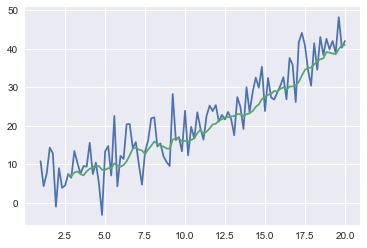

In [31]:
plt.plot(df.x, df.y)
plt.plot(df.x, df.y.rolling(window=10).mean())

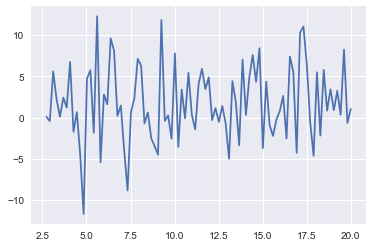

In [32]:
plt.plot(df.x, df.y - df.y.rolling(window=10).mean())

In [33]:
w = df.y - df.y.rolling(window=10).mean()
w

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9      0.090149
10    -0.432621
11     5.591471
12     2.234142
13     0.096937
14     2.419726
15     1.213305
16     6.743334
17    -1.725953
18     0.657034
19    -4.546436
20   -11.692390
21     4.740980
22     5.743369
23    -1.857718
24    12.288935
25    -5.437646
26     2.787135
27     1.613436
28     9.603395
29     8.124566
        ...    
70     7.581233
71     4.336427
72     8.412242
73    -3.704619
74     4.368761
75    -0.925483
76    -2.235119
77    -0.254566
78     0.784047
79     2.620526
80    -2.538929
81     7.405031
82     5.566080
83    -4.292742
84    10.286782
85    11.034617
86     6.424281
87    -0.568704
88    -4.643242
89     5.483636
90    -2.185494
91     5.781807
92     0.839650
93     3.425029
94     0.889609
95     3.235301
96     0.339075
97     8.233030
98    -0.660595
99     1.041023
Name: y, Length: 100, dt

In [34]:
w = w[9:]

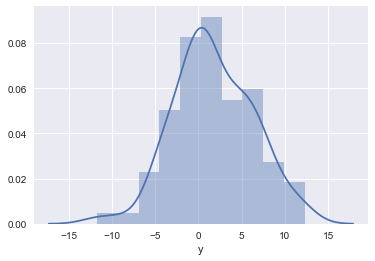

In [35]:
sns.distplot(w)

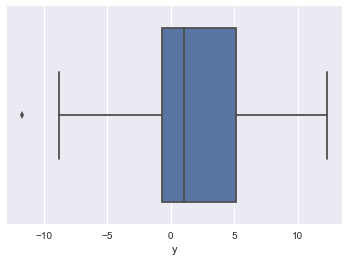

In [36]:
sns.boxplot(w)

## Outlier removal in Python using IQR rule
 - http://stamfordresearch.com/outlier-removal-in-python-using-iqr-rule/

In [37]:
q75, q25 = np.percentile(w, [75 ,25])
iqr = q75 - q25
 
mini = q25 - (iqr*1.5)
maxi = q75 + (iqr*1.5)

In [38]:
q75, q25

(5.157466166849959, -0.7073976359559406)

In [39]:
iqr

5.8648638028059

In [40]:
mini

-9.50469334016479

In [41]:
maxi

13.954761871058809

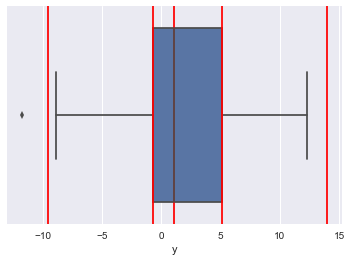

In [42]:
sns.boxplot(w, whis=1.5)
plt.axvline(x=mini, c='r')
plt.axvline(x=maxi, c='r')

plt.axvline(x=q75, c='r')
plt.axvline(x=q25, c='r')

plt.axvline(x=w.median(), c='r')

In [43]:
wr = w[(w>mini) & (w<maxi)]

In [44]:
q75, q25 = np.percentile(wr, [75 ,25])
iqr = q75 - q25
 
mini = q25 - (iqr*1.5)
maxi = q75 + (iqr*1.5)

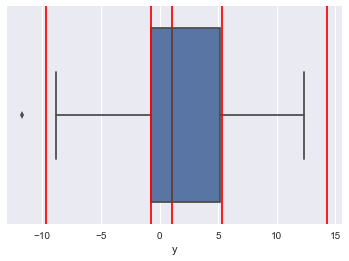

In [45]:
sns.boxplot(w, whis=1.5)
plt.axvline(x=mini, c='r')
plt.axvline(x=maxi, c='r')

plt.axvline(x=q75, c='r')
plt.axvline(x=q25, c='r')

plt.axvline(x=wr.median(), c='r')